# LLM experiments for sentiment analysis

## Import required packages

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
import datasets
from sklearn.model_selection import train_test_split
# Import generic wrappers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, AutoModel, DistilBertTokenizer, DistilBertModel


/Users/CA39WS/Repositories/llm-experiments/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/CA39WS/Repositories/llm-experiments/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Abels english dataset and test permormance

In [2]:
data = pd.read_csv('LLM_examples.csv', sep=';')

In [3]:
data.head()

,Sentence,Sentiment
0,I absolutely loved the new movie; it was fanta...,Positive
1,The customer service was excellent; they were ...,Positive
2,This is the best product I've ever used; highl...,Positive
3,I’m so happy with my recent purchase; it excee...,Positive
4,The event was incredibly well-organized and en...,Positive


## Test performance of task specific models

In [4]:
# Define the model repo
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest" 


# Download pytorch model
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/CA39WS/Repositories/llm-experiments/.venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be

In [5]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))

In [6]:
data['Predicted_sentiment'] = data['Sentence'].apply(lambda x: sentiment_score(x[:512]))

In [7]:
data

,Sentence,Sentiment,Predicted_sentiment
0,I absolutely loved the new movie; it was fanta...,Positive,2
1,The customer service was excellent; they were ...,Positive,2
2,This is the best product I've ever used; highl...,Positive,2
3,I’m so happy with my recent purchase; it excee...,Positive,2
4,The event was incredibly well-organized and en...,Positive,2
...,...,...,...
1015,Watched a few episodes of a show I’m catching ...,Neutral,2
1016,"The mail today was mostly bills, just the usual.",Neutral,1
1017,"Went for a walk around the neighborhood, it wa...",Neutral,2
1018,"Did a load of laundry this morning, just part ...",Neutral,1


In [8]:
data['Sentiment'] = data['Sentiment'].apply(lambda x: 2 if x == 'Positive' else 0 if x == 'Negative' else 1)
data.head()

,Sentence,Sentiment,Predicted_sentiment
0,I absolutely loved the new movie; it was fanta...,2,2
1,The customer service was excellent; they were ...,2,2
2,This is the best product I've ever used; highl...,2,2
3,I’m so happy with my recent purchase; it excee...,2,2
4,The event was incredibly well-organized and en...,2,2


In [9]:
#chech performance
from sklearn import metrics

# define confusion matrix
confusion_matrix = metrics.confusion_matrix(data['Sentiment'], data['Predicted_sentiment'])

print(confusion_matrix)

[[335   3   2]
 [ 19 157 164]
 [  0   0 340]]


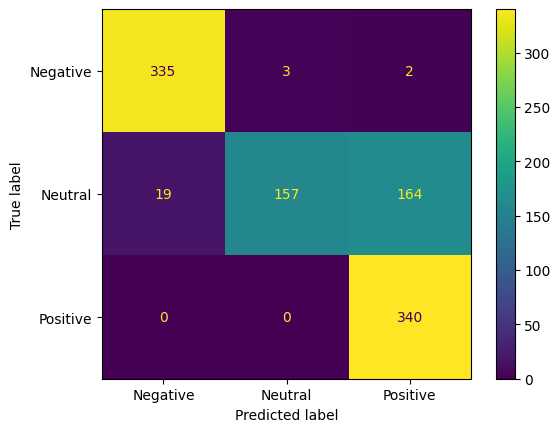

In [10]:
# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative", "Neutral", "Positive"])

# display matrix
cm_display.plot()
plt.show()

## Test performance of much smaller model

In [11]:

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-cased", num_labels=3)

def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))

data['Predicted_sentiment'] = data['Sentence'].apply(lambda x: sentiment_score(x[:512]))

/Users/CA39WS/Repositories/llm-experiments/.venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[  0 212 128]
 [  0 206 134]
 [  0 314  26]]


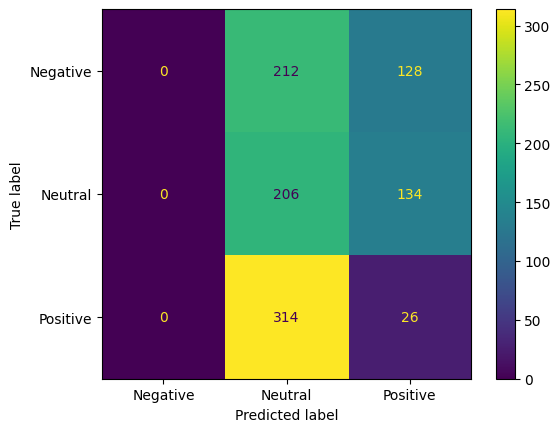

In [12]:
#chech performance
from sklearn import metrics

# define confusion matrix
confusion_matrix = metrics.confusion_matrix(data['Sentiment'], data['Predicted_sentiment'])

print(confusion_matrix)

# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative", "Neutral", "Positive"])

# display matrix
cm_display.plot()
plt.show()

We can see that the model performs very bad. Let's try finetuning it.

In [13]:
data = data.rename(columns={"Sentence": "text", "Sentiment": "label"})
data.reset_index(inplace=True, drop = True)

In [14]:
data.head()

,text,label,Predicted_sentiment
0,I absolutely loved the new movie; it was fanta...,2,1
1,The customer service was excellent; they were ...,2,1
2,This is the best product I've ever used; highl...,2,1
3,I’m so happy with my recent purchase; it excee...,2,1
4,The event was incredibly well-organized and en...,2,1


In [20]:
train, test = train_test_split(
    data, test_size=0.2, random_state=42,stratify= data['label'])

train, validation = train_test_split(
    train, test_size=0.2, random_state=42
)

In [24]:
#Creating Dataset Objects
dataset_train = datasets.Dataset.from_pandas(train)
dataset_test = datasets.Dataset.from_pandas(test)
dataset_val = datasets.Dataset.from_pandas(validation)

In [25]:
# let's train a Distilbert model

from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# let's tokenize the data for the model to be able to understand
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

sentences_train_encoded = dataset_train.map(tokenize, batched=True)
# sentences_train_encoded = sentences_train_encoded.remove_columns(dataset_train.column_names)
sentences_test_encoded = dataset_test.map(tokenize, batched=True)
# sentences_test_encoded = sentences_test_encoded.remove_columns(dataset_test.column_names)
sentences_validation_encoded = dataset_val.map(tokenize, batched=True)
# sentences_validation_encoded = sentences_validation_encoded.remove_columns(dataset_val.column_names)

/Users/CA39WS/Repositories/llm-experiments/.venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Map: 100%|██████████| 164/164 [00:00<00:00, 26571.86 examples/s]


In [26]:
from transformers import AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 3
id2label = {
    "0": "Negative",
    "1": "Neutral",
    "2": "Positive"
}
label2id = {
    "0": "Negative",
    "1": "Neutral",
    "2": "Positive"
}

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels, id2label=id2label, label2id=label2id).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [28]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(sentences_train_encoded) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=6,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=False,
    log_level="error"
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=sentences_train_encoded,
    eval_dataset=sentences_validation_encoded,
    tokenizer=tokenizer
)

/Users/CA39WS/Repositories/llm-experiments/.venv/lib/python3.9/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [29]:
trainer.train()


 15%|█▌        | 10/66 [00:02<00:11,  4.85it/s]

{'loss': 1.0771, 'grad_norm': 1.1216514110565186, 'learning_rate': 1.6969696969696972e-05, 'epoch': 0.91}


 17%|█▋        | 11/66 [00:03<00:17,  3.12it/s]

{'eval_loss': 1.0171589851379395, 'eval_accuracy': 0.75, 'eval_f1': 0.749717696170179, 'eval_runtime': 0.3063, 'eval_samples_per_second': 535.451, 'eval_steps_per_second': 9.795, 'epoch': 1.0}


 30%|███       | 20/66 [00:05<00:09,  4.68it/s]

{'loss': 0.9532, 'grad_norm': 2.1319470405578613, 'learning_rate': 1.3939393939393942e-05, 'epoch': 1.82}


                                               
 33%|███▎      | 22/66 [00:05<00:09,  4.74it/s]

{'eval_loss': 0.8030107021331787, 'eval_accuracy': 0.9085365853658537, 'eval_f1': 0.9068854713826672, 'eval_runtime': 0.1709, 'eval_samples_per_second': 959.7, 'eval_steps_per_second': 17.555, 'epoch': 2.0}


 45%|████▌     | 30/66 [00:07<00:07,  4.82it/s]

{'loss': 0.7515, 'grad_norm': 2.629857063293457, 'learning_rate': 1.0909090909090909e-05, 'epoch': 2.73}


                                               
 50%|█████     | 33/66 [00:08<00:06,  4.86it/s]

{'eval_loss': 0.5818476676940918, 'eval_accuracy': 0.9451219512195121, 'eval_f1': 0.9444957950319763, 'eval_runtime': 0.1706, 'eval_samples_per_second': 961.278, 'eval_steps_per_second': 17.584, 'epoch': 3.0}


 61%|██████    | 40/66 [00:09<00:05,  4.91it/s]

{'loss': 0.5393, 'grad_norm': 1.8502439260482788, 'learning_rate': 7.87878787878788e-06, 'epoch': 3.64}


                                               
 67%|██████▋   | 44/66 [00:10<00:04,  4.94it/s]

{'eval_loss': 0.4220176935195923, 'eval_accuracy': 0.9573170731707317, 'eval_f1': 0.9570504558950454, 'eval_runtime': 0.1714, 'eval_samples_per_second': 956.642, 'eval_steps_per_second': 17.5, 'epoch': 4.0}


 76%|███████▌  | 50/66 [00:11<00:03,  4.86it/s]

{'loss': 0.4147, 'grad_norm': 1.8868110179901123, 'learning_rate': 4.848484848484849e-06, 'epoch': 4.55}


                                               
 83%|████████▎ | 55/66 [00:12<00:02,  4.94it/s]

{'eval_loss': 0.3357468247413635, 'eval_accuracy': 0.9695121951219512, 'eval_f1': 0.9695927071536828, 'eval_runtime': 0.1707, 'eval_samples_per_second': 960.487, 'eval_steps_per_second': 17.57, 'epoch': 5.0}


 91%|█████████ | 60/66 [00:13<00:01,  4.83it/s]

{'loss': 0.3296, 'grad_norm': 2.0949583053588867, 'learning_rate': 1.8181818181818183e-06, 'epoch': 5.45}


                                               
100%|██████████| 66/66 [00:15<00:00,  4.18it/s]

{'eval_loss': 0.31083470582962036, 'eval_accuracy': 0.975609756097561, 'eval_f1': 0.975676085432183, 'eval_runtime': 0.189, 'eval_samples_per_second': 867.533, 'eval_steps_per_second': 15.87, 'epoch': 6.0}
{'train_runtime': 15.7798, 'train_samples_per_second': 247.913, 'train_steps_per_second': 4.183, 'train_loss': 0.6414189158063947, 'epoch': 6.0}


TrainOutput(global_step=66, training_loss=0.6414189158063947, metrics={'train_runtime': 15.7798, 'train_samples_per_second': 247.913, 'train_steps_per_second': 4.183, 'total_flos': 26315945963424.0, 'train_loss': 0.6414189158063947, 'epoch': 6.0})

In [30]:
preds_output = trainer.predict(sentences_validation_encoded)
preds_output.metrics

100%|██████████| 3/3 [00:00<00:00, 28.86it/s]


{'test_loss': 0.31083470582962036,
 'test_accuracy': 0.975609756097561,
 'test_f1': 0.975676085432183,
 'test_runtime': 0.2505,
 'test_samples_per_second': 654.648,
 'test_steps_per_second': 11.975}

In [31]:
preds_output = trainer.predict(sentences_test_encoded)
preds_output.metrics

100%|██████████| 4/4 [00:00<00:00, 18.72it/s]


{'test_loss': 0.30101850628852844,
 'test_accuracy': 0.9803921568627451,
 'test_f1': 0.9803849976188885,
 'test_runtime': 0.3616,
 'test_samples_per_second': 564.181,
 'test_steps_per_second': 11.062}

[[68  0  0]
 [ 0 68  0]
 [ 0  0 68]]


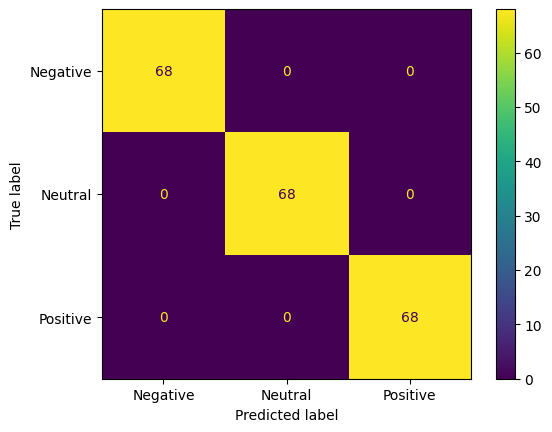

In [34]:
#chech performance
from sklearn import metrics

# define confusion matrix
confusion_matrix = metrics.confusion_matrix(sentences_test_encoded['label'], preds_output.label_ids)

print(confusion_matrix)

# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative", "Neutral", "Positive"])

# display matrix
cm_display.plot()
plt.show()